# Abgabe Data Exploration Project David Stark 7086219 

## Notebook setup

In [2]:
!pip install mlflow
!apt-get install git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.6-py3-none-any.whl size=143237 sha256=b2dc4c51672eee4db632d222a25368

In [3]:
from google.colab import drive
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
import mlflow
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Cloning my Github-Repository
!git clone https://github.com/StrongAnalysis/DataExplorationAbgabe.git

Cloning into 'DataExplorationAbgabe'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), 1.99 MiB | 1.49 MiB/s, done.


##Load the data

In [5]:
def load_data_and_model(data_path, model_path):
    """
    Function to load the data and the model from my Github-Repository.

    Parameters
    ----------
    data_path : str
        Path to the data.
    model_path : str
        Path to the model.
    
    Returns
    -------
    df : Pandas DataFrame
        Dataframe containing the data.
    model : sklearn.neighbors._classification.KNeighborsClassifier 
        Trained model. 
    """

    # Load the data
    df = pd.read_csv(data_path)

    # Load the model
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    return df, model

# Call the function
data_path = '/content/DataExplorationAbgabe/train.csv' 
model_path = '/content/DataExplorationAbgabe/model.pkl'
df, model = load_data_and_model(data_path, model_path)

##Prepare the data

In [6]:
def prepare_data(df):
    """
    Function to prepare the data.

    Parameters
    ----------
    df : Pandas DataFrame
        Dataframe containing the data.
    
    Returns
    -------
    x_test : numpy array
        Contains the features of the test data.
    y_test : numpy array
        Contains the labels of the test data.
    """

    # Assigning the features to the variable X_train
    X_train = np.array(df[['battery_power', 'blue', 'clock_speed', 'fc', 'four_g', 'int_memory',
                                   'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
                                   'talk_time', 'three_g', 'touch_screen', 'm_dep', 'mobile_wt', 'dual_sim', 'wifi']]) 
    
    # Assigning the labels to the variable Y_train
    Y_train = np.array(df['price_range'])

    # Splitting the data into training and test data
    X_train_val, x_test, Y_train_val, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

    # Splitting the training data into training and validation data
    X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, random_state=42)

    return x_test, y_test

##Visualization: Correlation Matrix

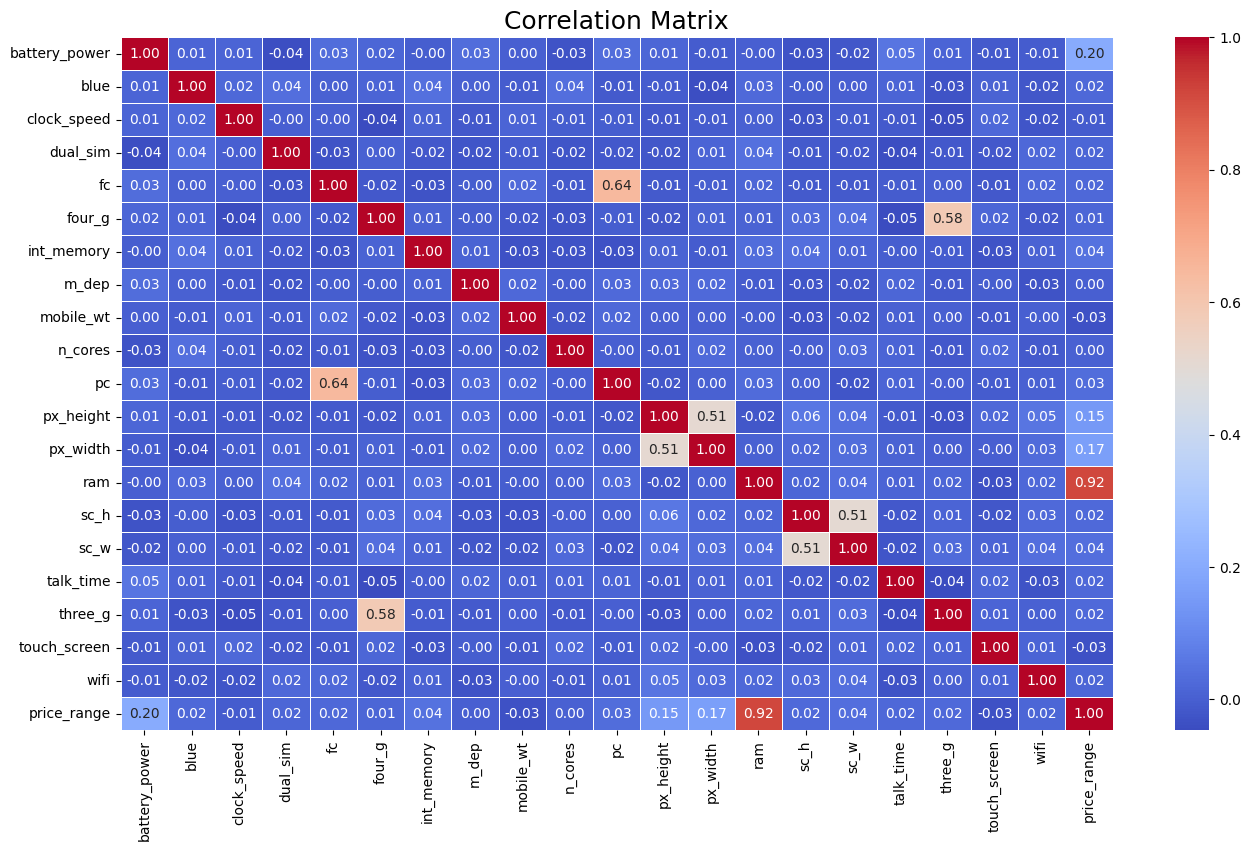

In [7]:
def calculate_correlation_matrix(df):
    """
    Function to calculate and visualize the Pearson correlation coefficients as a heatmap.

    Parameters
    ----------
    df : Pandas Dataframe
        Pandas Dataframe which contains the data from the csv file.
    """
    # Calculate the Pearson correlation coefficients
    correlation_matrix = df.corr()
    
    # Enlarge the plot
    plt.figure(figsize=(16, 9)) 

    # Visualize the Pearson correlation coefficients as a heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

    # Set the title
    plt.title("Correlation Matrix", fontsize=18)

    plt.show()

# Call the function with the loaded dataframe
calculate_correlation_matrix(df)

## Visualization: scatter plot

In [8]:
def visualize_3d_scatter(df):
    """
    Function to visualize the relation between price, ram and depth of the mobile phones in a 3D scatter plot.

    Parameters
    ----------
    df : Pandas Dataframe
        Pandas Dataframe which contains the data from the csv file.
    """

    # Create a 3D scatter plot
    fig = px.scatter_3d(df, x=df["price_range"], y=df["ram"], z=df["m_dep"], color=df["price_range"])

    # Set the title of the plot
    fig.update_layout(title="Ratio between price, ram and depth")

    fig.show()

  # Call the function with the loaded dataframe
visualize_3d_scatter(df)

##Call the function and show the results

In [ ]:
# Call the function
x_test, y_test = prepare_data(df)

# Evaluate on test set
Y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, Y_test_pred)

print(f"Test accuracy: {test_accuracy}")